# OBESITY LEVELS PREDICTION USING MACHINE LEARNING AND DEEP LEARNING METHODS
# TEAM 1

# IMPORTING NECESSARY LIBRARIES AND MODELS

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

#DATASET EXPLORATION AND VISUALISATION

In [2]:
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")

In [3]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [7]:
train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
test.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
train=train.drop_duplicates()
test=test.drop_duplicates()

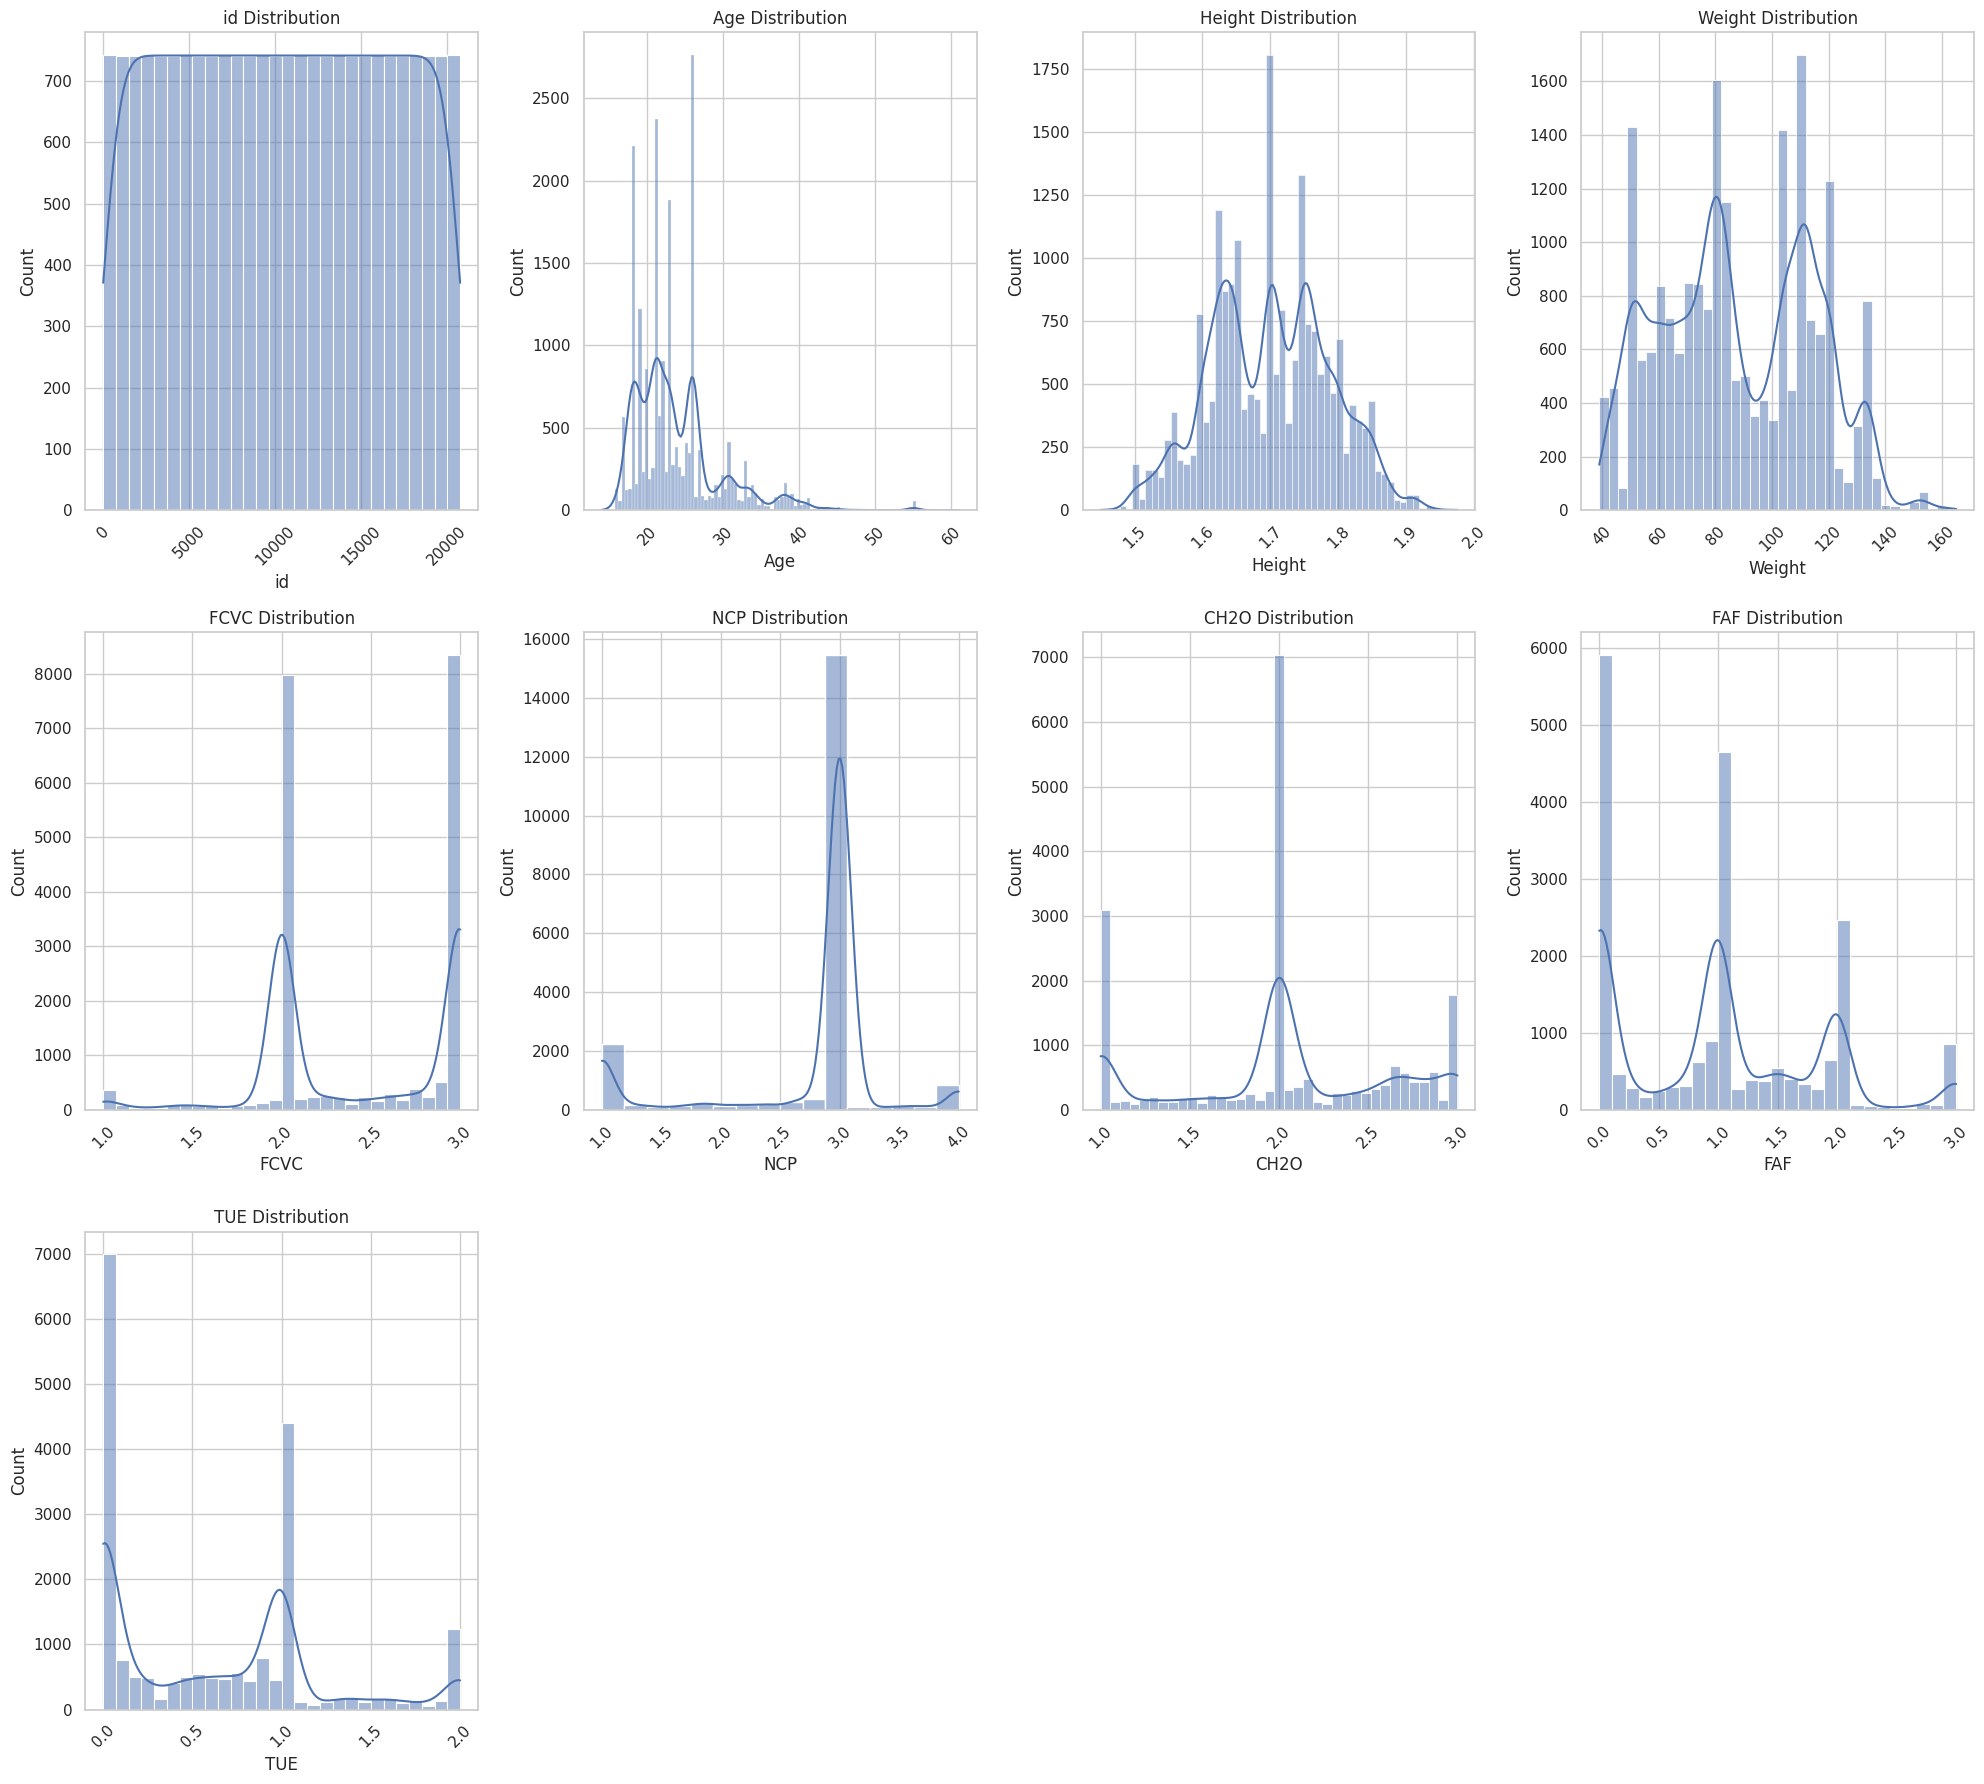

In [10]:

#numerical data visualisation
sns.set(style="whitegrid")
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
num_cols = len(numerical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20, 6 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.histplot(train[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

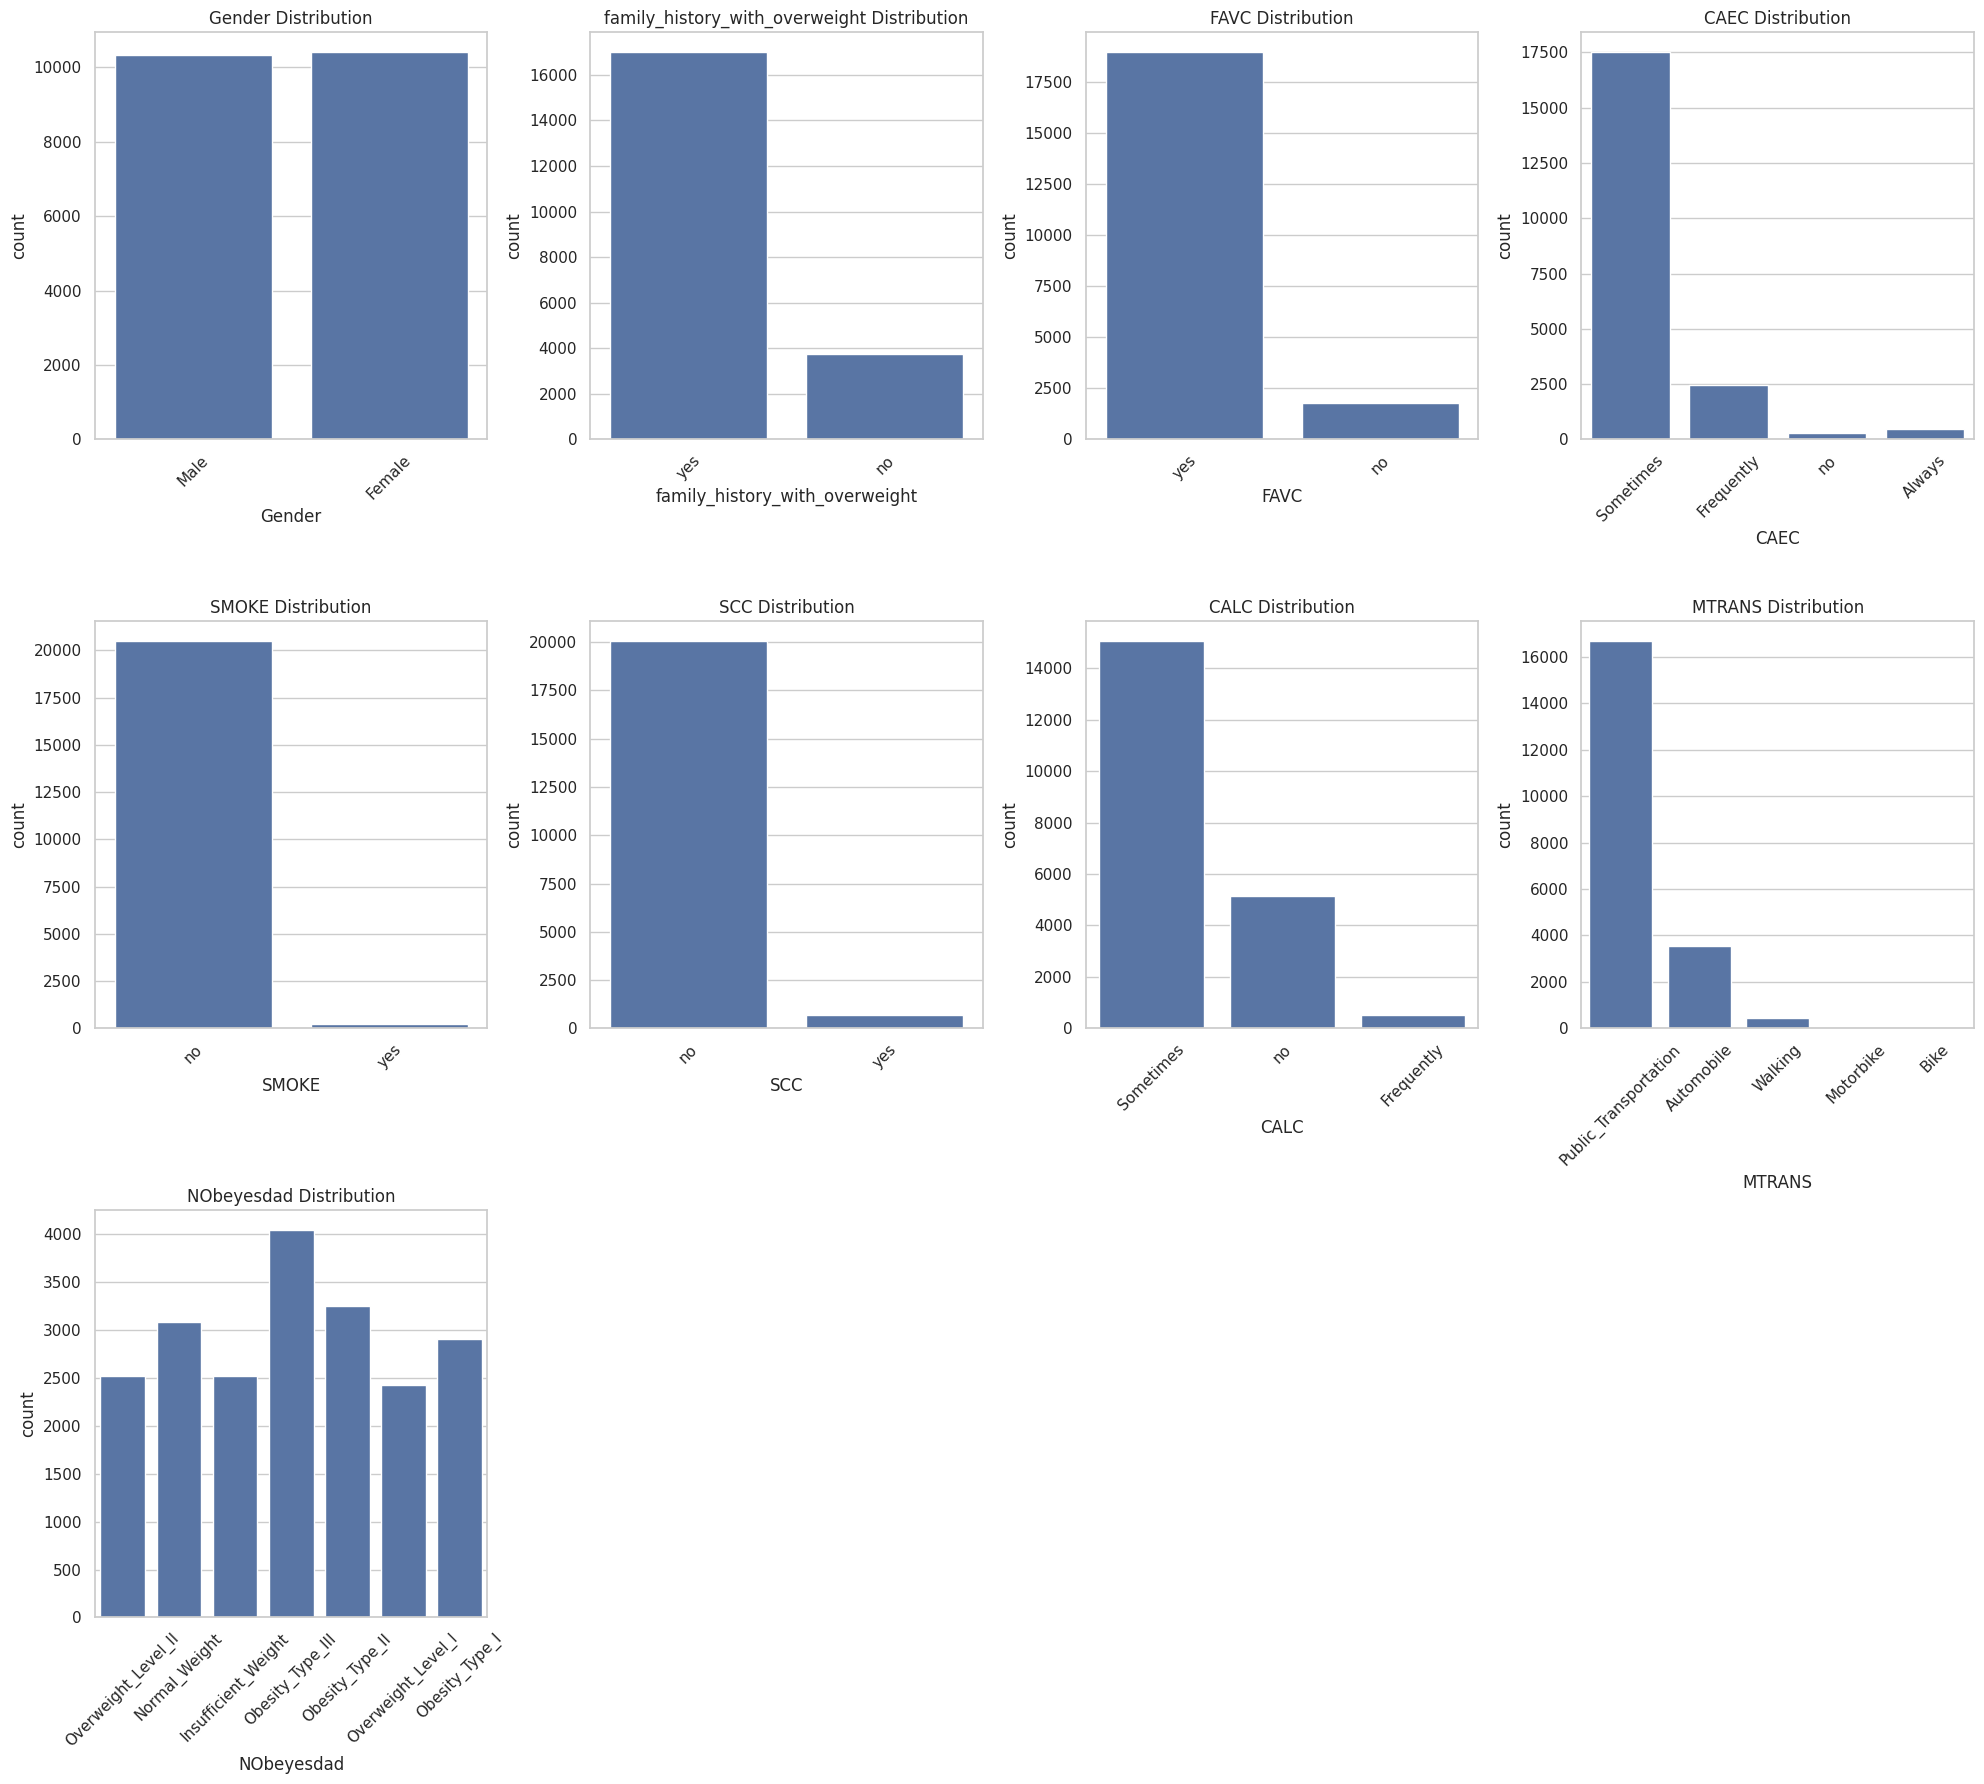

In [11]:
#categorical data visualisation
num_cols = len(categorical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20,6 *num_rows))
for i ,col in enumerate(categorical_columns,1):
    plt.subplot(num_rows, 4, i)
    sns.countplot(x= col, data=train)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# DATA PRE-PROCESSING

In [12]:
#converting binary categorical data into numerical data (0/1)
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
train=pd.get_dummies(train,columns=columns,drop_first=True,dtype=int)
test=pd.get_dummies(test,columns=columns,drop_first=True,dtype=int)

#converting muli-valued attribute data into numerical data by one-hot enconding
le=LabelEncoder()
a=['CAEC','CALC','MTRANS']
for i in a:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

train['NObeyesdad']=le.fit_transform(train['NObeyesdad'])

In [13]:
#Power Tranformer to normalise the features to enhance the model's performance
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('NObeyesdad', axis=1)
train_features_scaled = pt.fit_transform(train_features)

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train['NObeyesdad']

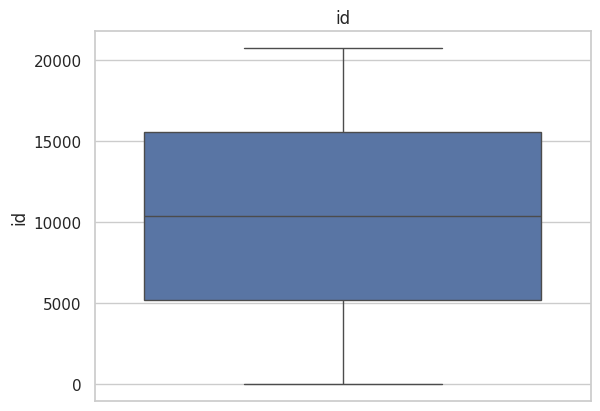

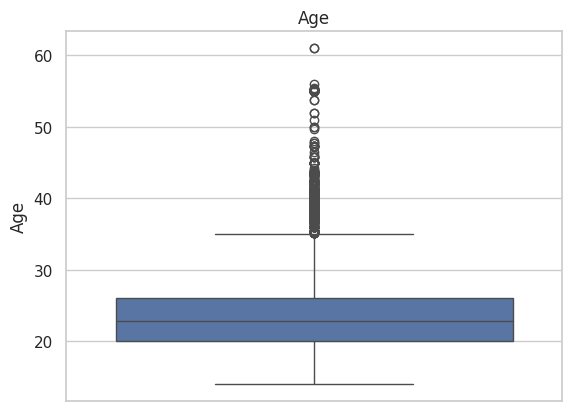

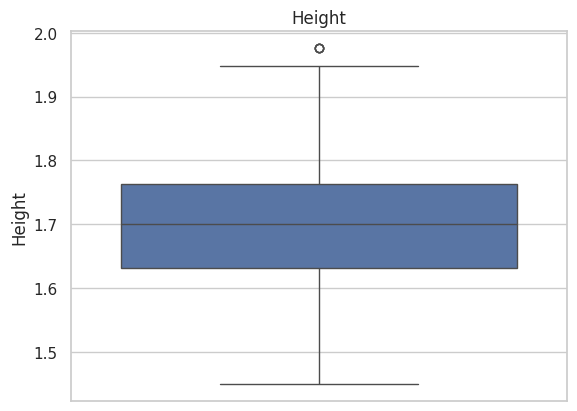

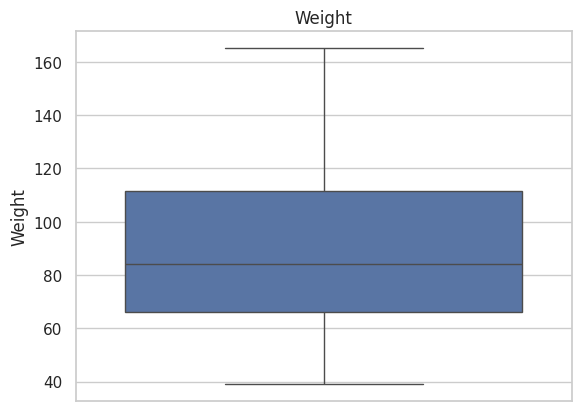

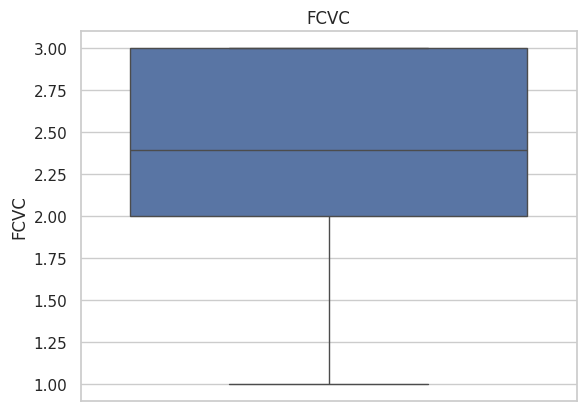

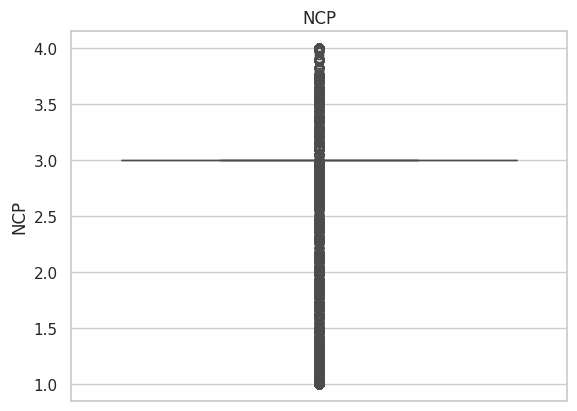

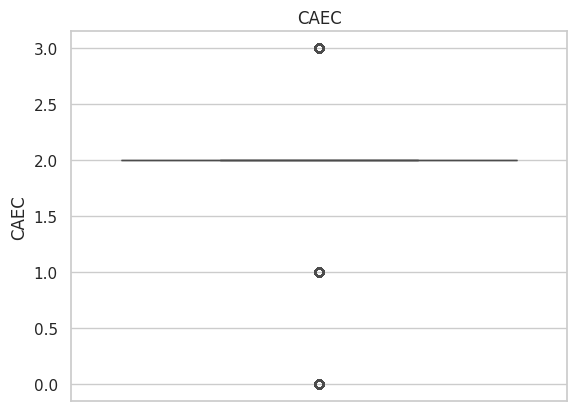

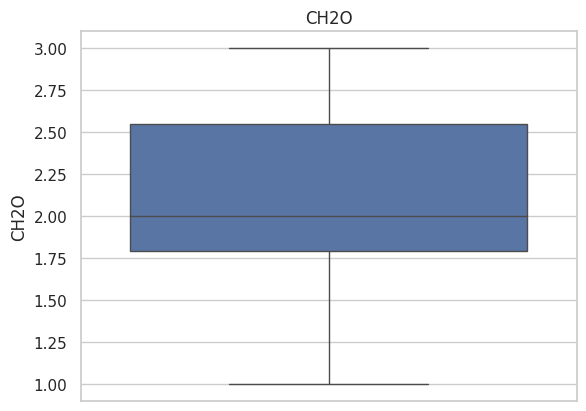

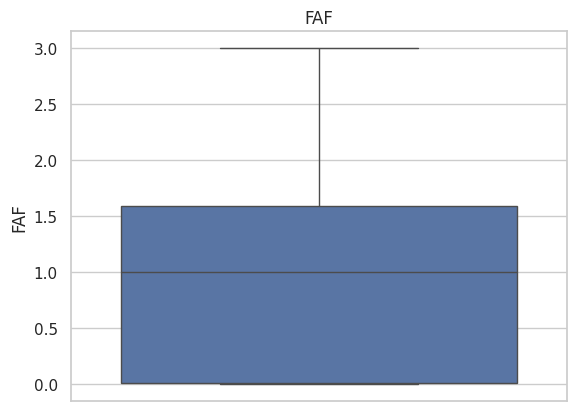

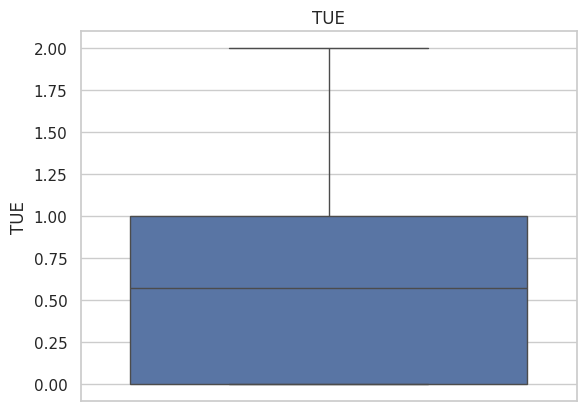

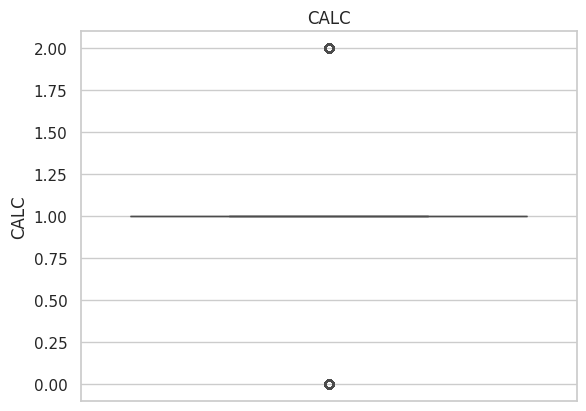

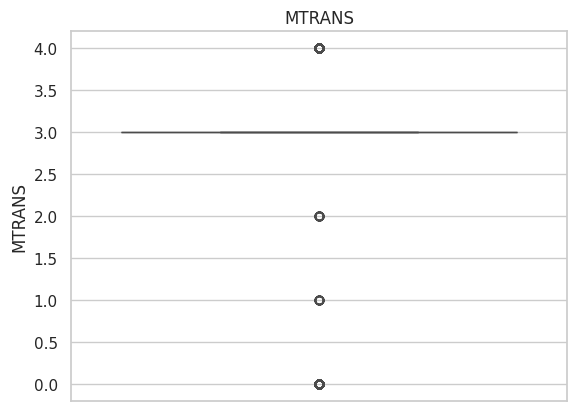

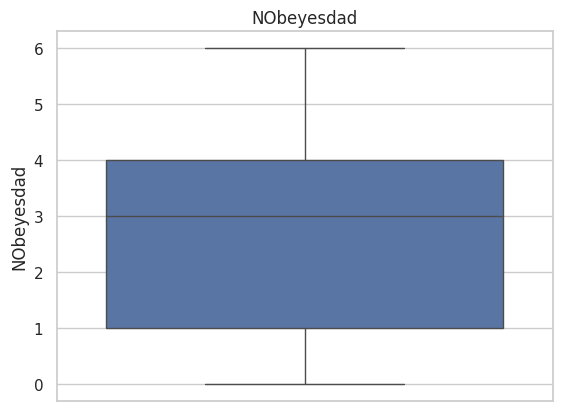

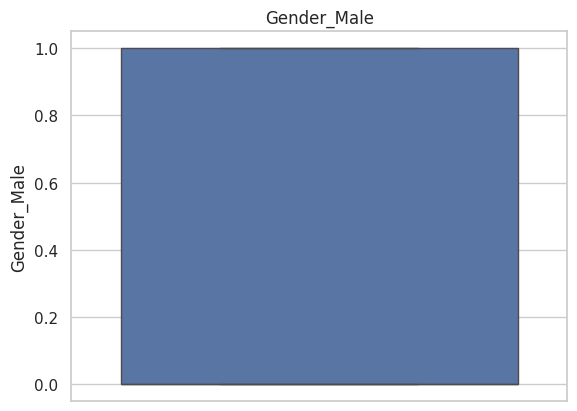

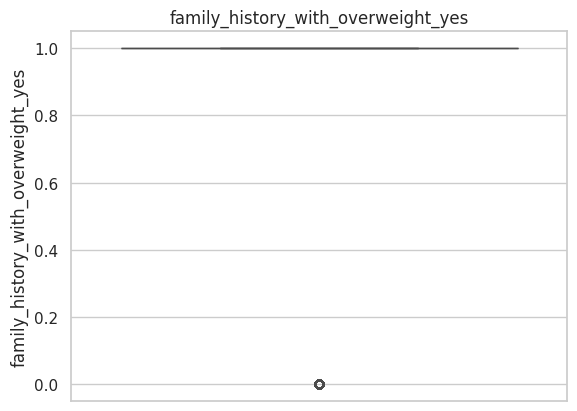

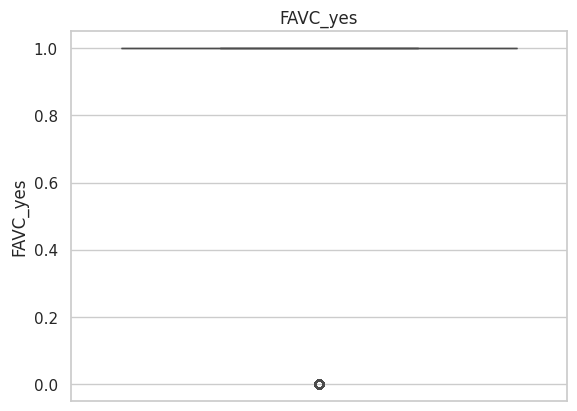

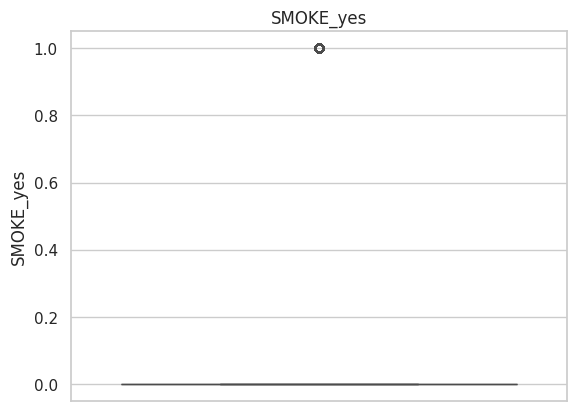

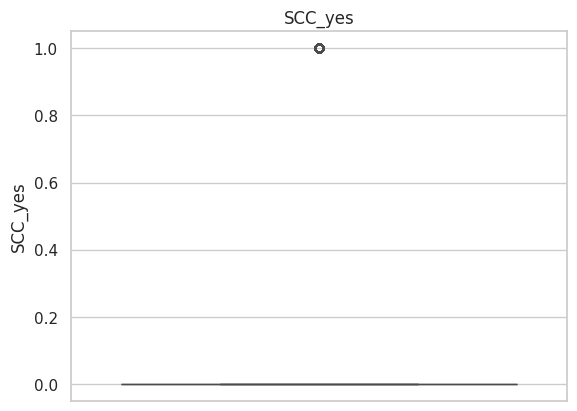

In [14]:
#checking for outliers in training dataset
for i in train.columns:
    sns.boxplot(train[i])
    plt.title(i)
    plt.show()

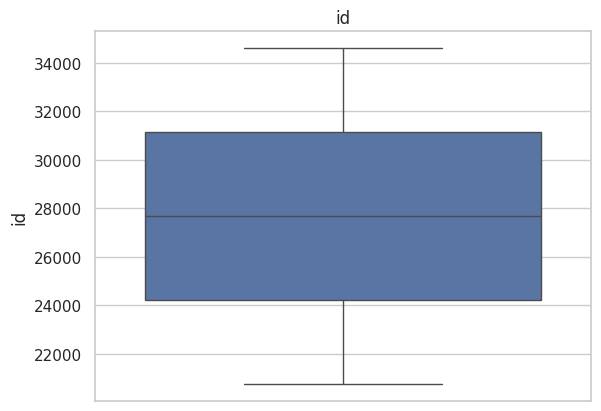

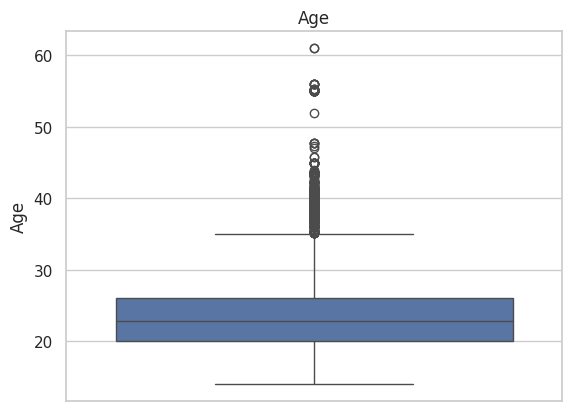

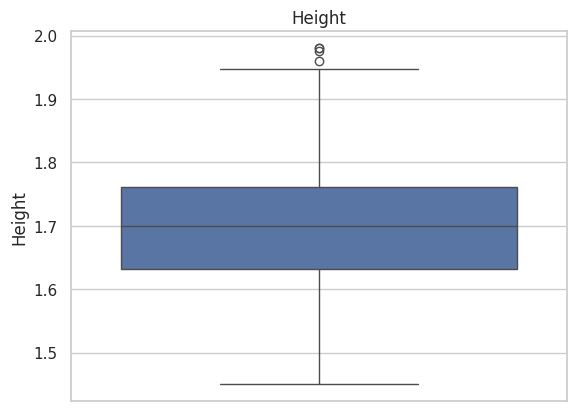

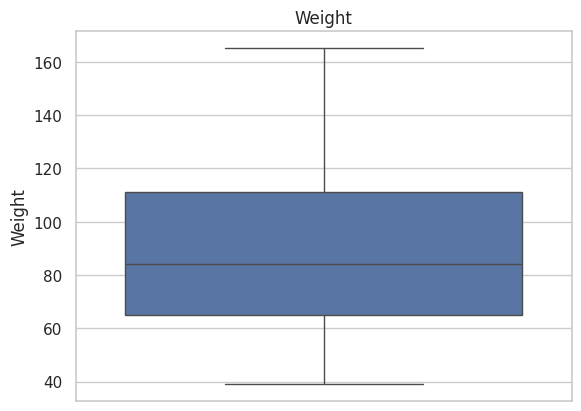

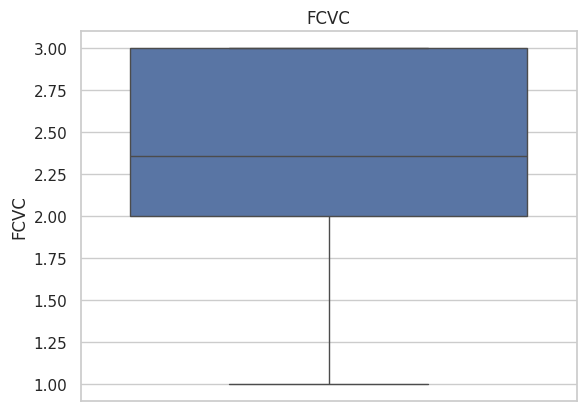

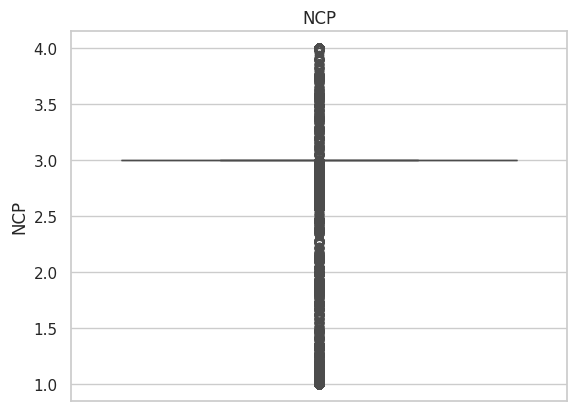

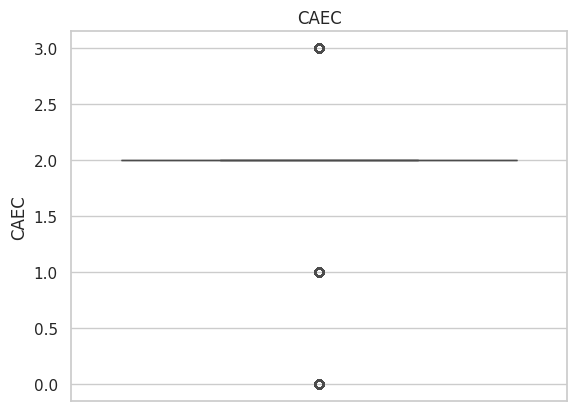

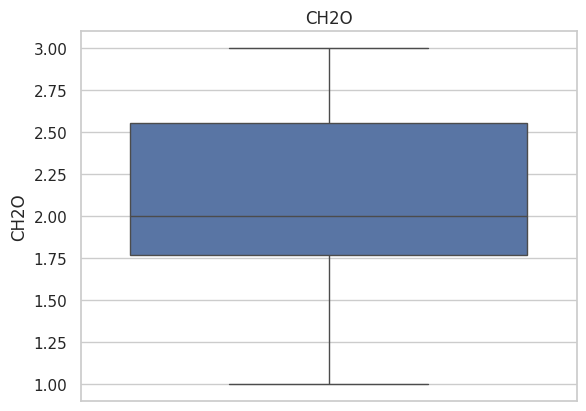

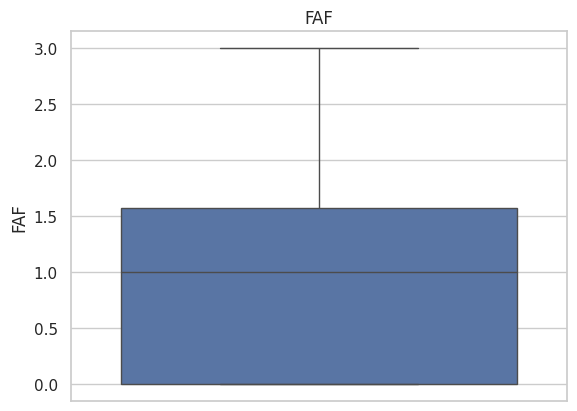

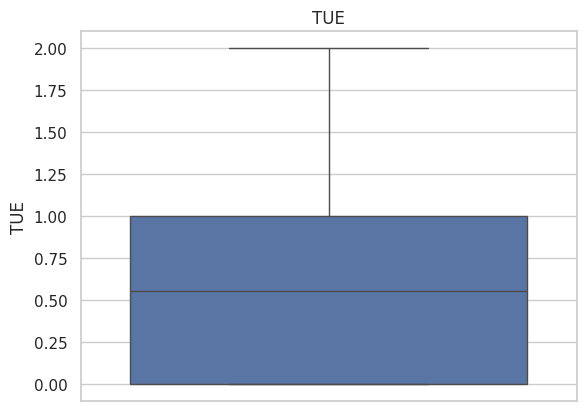

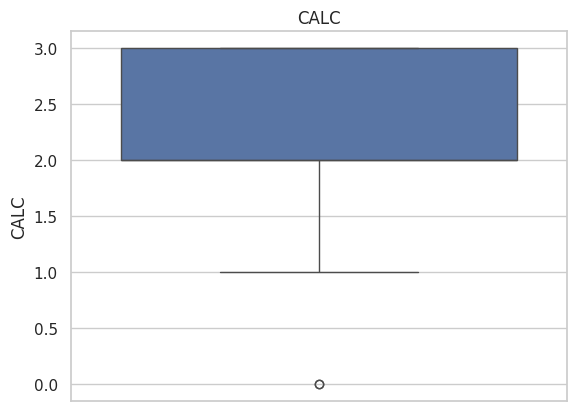

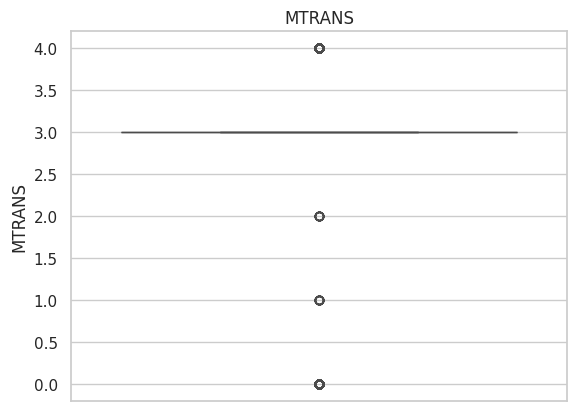

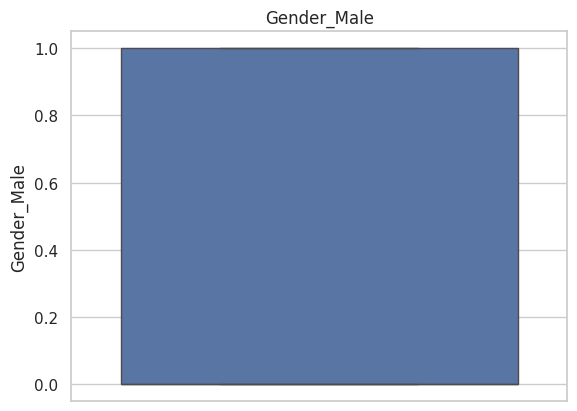

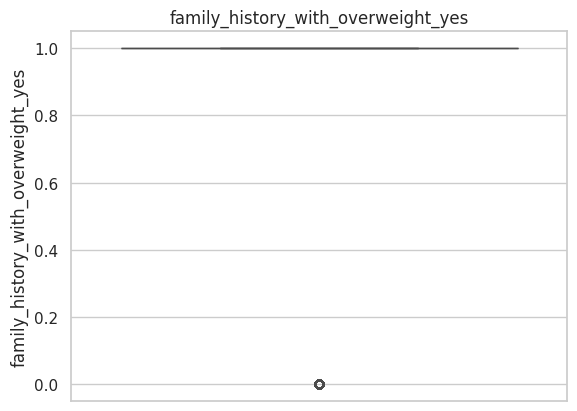

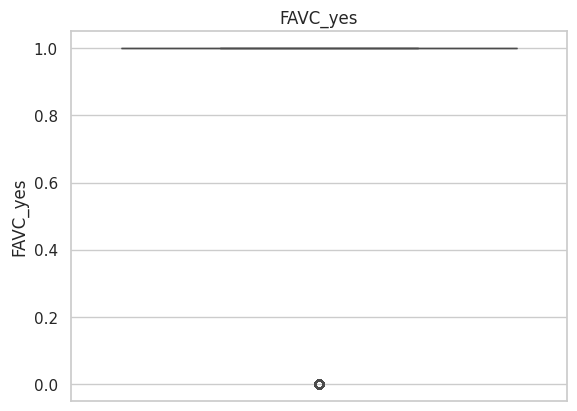

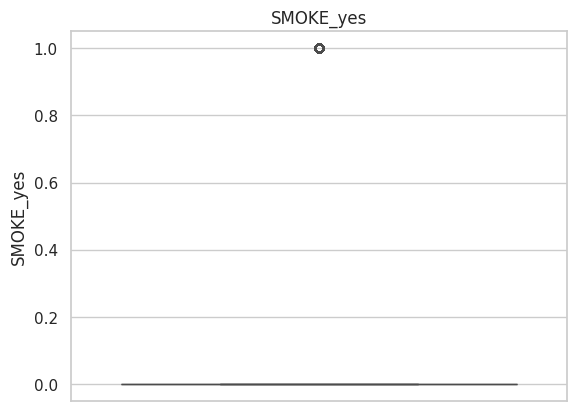

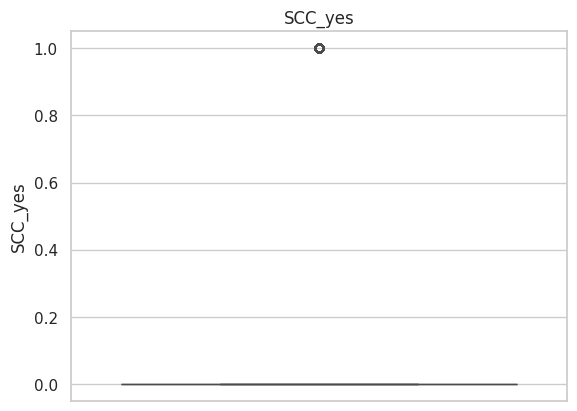

In [15]:
#checking for outliers in testing dataset
for i in test.columns:
    sns.boxplot(test[i])
    plt.title(i)
    plt.show()

In [16]:
#block of code to remove outliers
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)

In [17]:
b=['CALC','NCP']
for i in b:
    train=train.drop(i,axis=1)

# SPLITTING UP OF THE DATA INTO TRAINING VALIDATION AND TESTING

In [18]:
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

#Final split => train-val-testing => 80-10-10
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) #80-20
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) #20 => 10-10

# Decision Tree model training and evaluation


In [19]:
# Decision Tree Model Training and Evaluation
dt = DecisionTreeClassifier(random_state=45, max_depth=9, )
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [20]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.9582753824756607
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.81      0.90      0.85        42
           2       0.91      0.91      0.91        56
           3       0.99      0.98      0.99       116
           4       1.00      0.99      0.99       426
           5       0.78      0.78      0.78        40
           6       0.88      0.85      0.86        26

    accuracy                           0.96       719
   macro avg       0.90      0.89      0.89       719
weighted avg       0.96      0.96      0.96       719



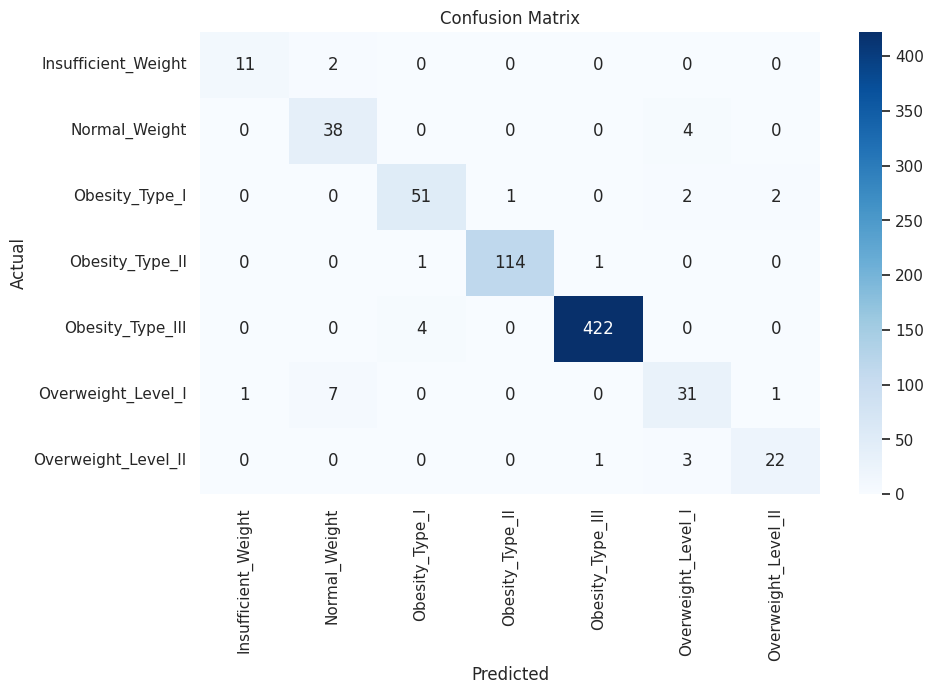

In [21]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
from sklearn.model_selection import GridSearchCV


# **Hyper Parameter Tuning for Decision Tree**

In [29]:
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}




In [30]:
dt = DecisionTreeClassifier(random_state=45)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=45),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [31]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [32]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.9652294853963839
Classification Report:               precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.83      0.93      0.88        42
           2       0.95      0.93      0.94        56
           3       0.98      0.98      0.98       116
           4       1.00      1.00      1.00       426
           5       0.81      0.85      0.83        40
           6       0.95      0.73      0.83        26

    accuracy                           0.97       719
   macro avg       0.90      0.89      0.90       719
weighted avg       0.97      0.97      0.97       719



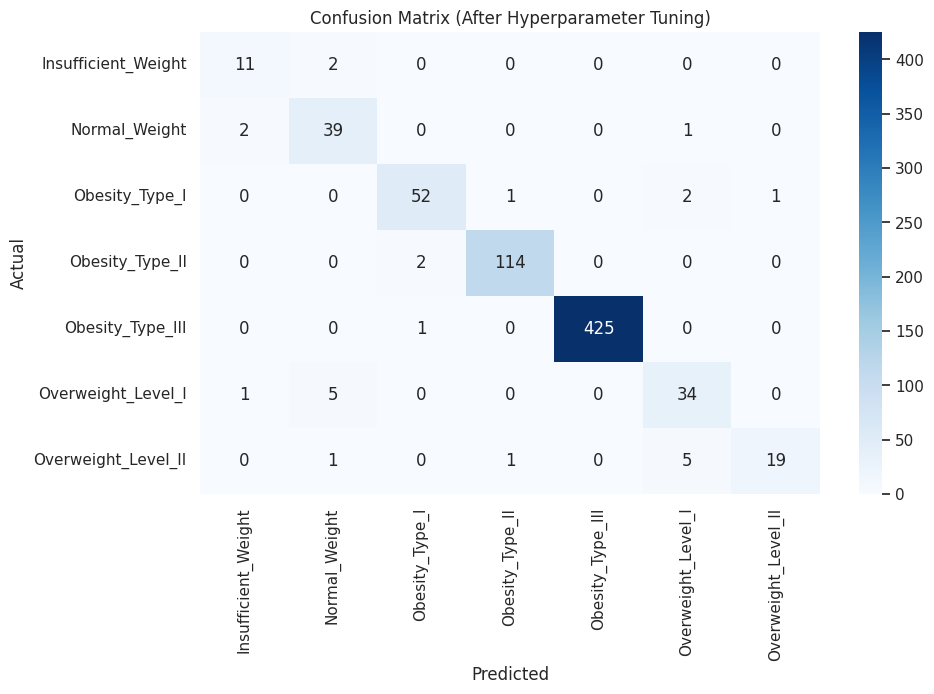

In [33]:
best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (After Hyperparameter Tuning)')
plt.show()